# Exploration

In [190]:
# Import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')      # Ignore seaborn warning messages

In [191]:
# Import the dataset 

realestate = pd.read_csv('regression_data_clean.csv')

In [192]:
realestate.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [193]:
realestate.tail()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000
21596,1523300157,10/15/14,2,0.75,1020,1076,2.0,0,0,3,...,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,325000


In [194]:
realestate.shape            # Check number of columns and rows in the dataframe

(21597, 21)

In [195]:
realestate.columns          # Check the column names

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [196]:
# Since columns are already in a standardised format no changes are made

In [197]:
realestate.dtypes               # Checking the data types

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [198]:
# Change date column to datatype 'date'. 
# Leaving this column like this for now as it might be drop before defining the model.

realestate['date'] = pd.to_datetime(realestate['date'], errors = 'coerce')

In [199]:
# Since all other columns are in a numerical format I leave them like this for now. 

In [200]:
realestate.dtypes            # Checking the updated datatype for date

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [201]:
realestate.info()     # Further explore the different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [202]:
realestate.isnull().any()         # Checking for null values

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [203]:
realestate.isnull().sum()*100/realestate.shape[0]        # Confirming zero null values

id               0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

In [204]:
realestate.nunique()        # Checking the unique values of each column

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [205]:
realestate['id'].value_counts()       # Note that there are some duplicate values in the ID column

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [206]:
# Check duplicate values

duplicate_id = realestate[realestate.duplicated(subset=['id'], keep=False)]

duplicate_id.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,2014-07-25,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,430000
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
313,4139480200,2014-06-18,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
324,7520000520,2014-09-05,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000


In [207]:
# Since the duplicate ID's seem to be for the same property but at a different date and at a different price
# I decide to keep them. This could indicate that the property was sold more than once
# and could be important for our analysis.

In [208]:
realestate.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [209]:
# One of the houses have 33 rooms and must be very large. I want to analyse this further. 

realestate[(realestate.bedrooms == 33)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [210]:
# 33 rooms but only 1.75 toilets and 4700 squarefeet. This could be bad data.
# I am going to keep it for now since we do not have any evidence 

In [211]:
# All columns are already in a numeric format, however, since some variables are discrete
# and others are continuous in nature I explore the correlation
# with the dependent variable 'price' using both scatter plots and box plots

In [212]:
# Visualising using scatter plot

In [213]:
realestate_con = realestate.drop(['id', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'lat', 'long', 'zipcode', 'floors'], axis = 1)

In [214]:
realestate_con.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

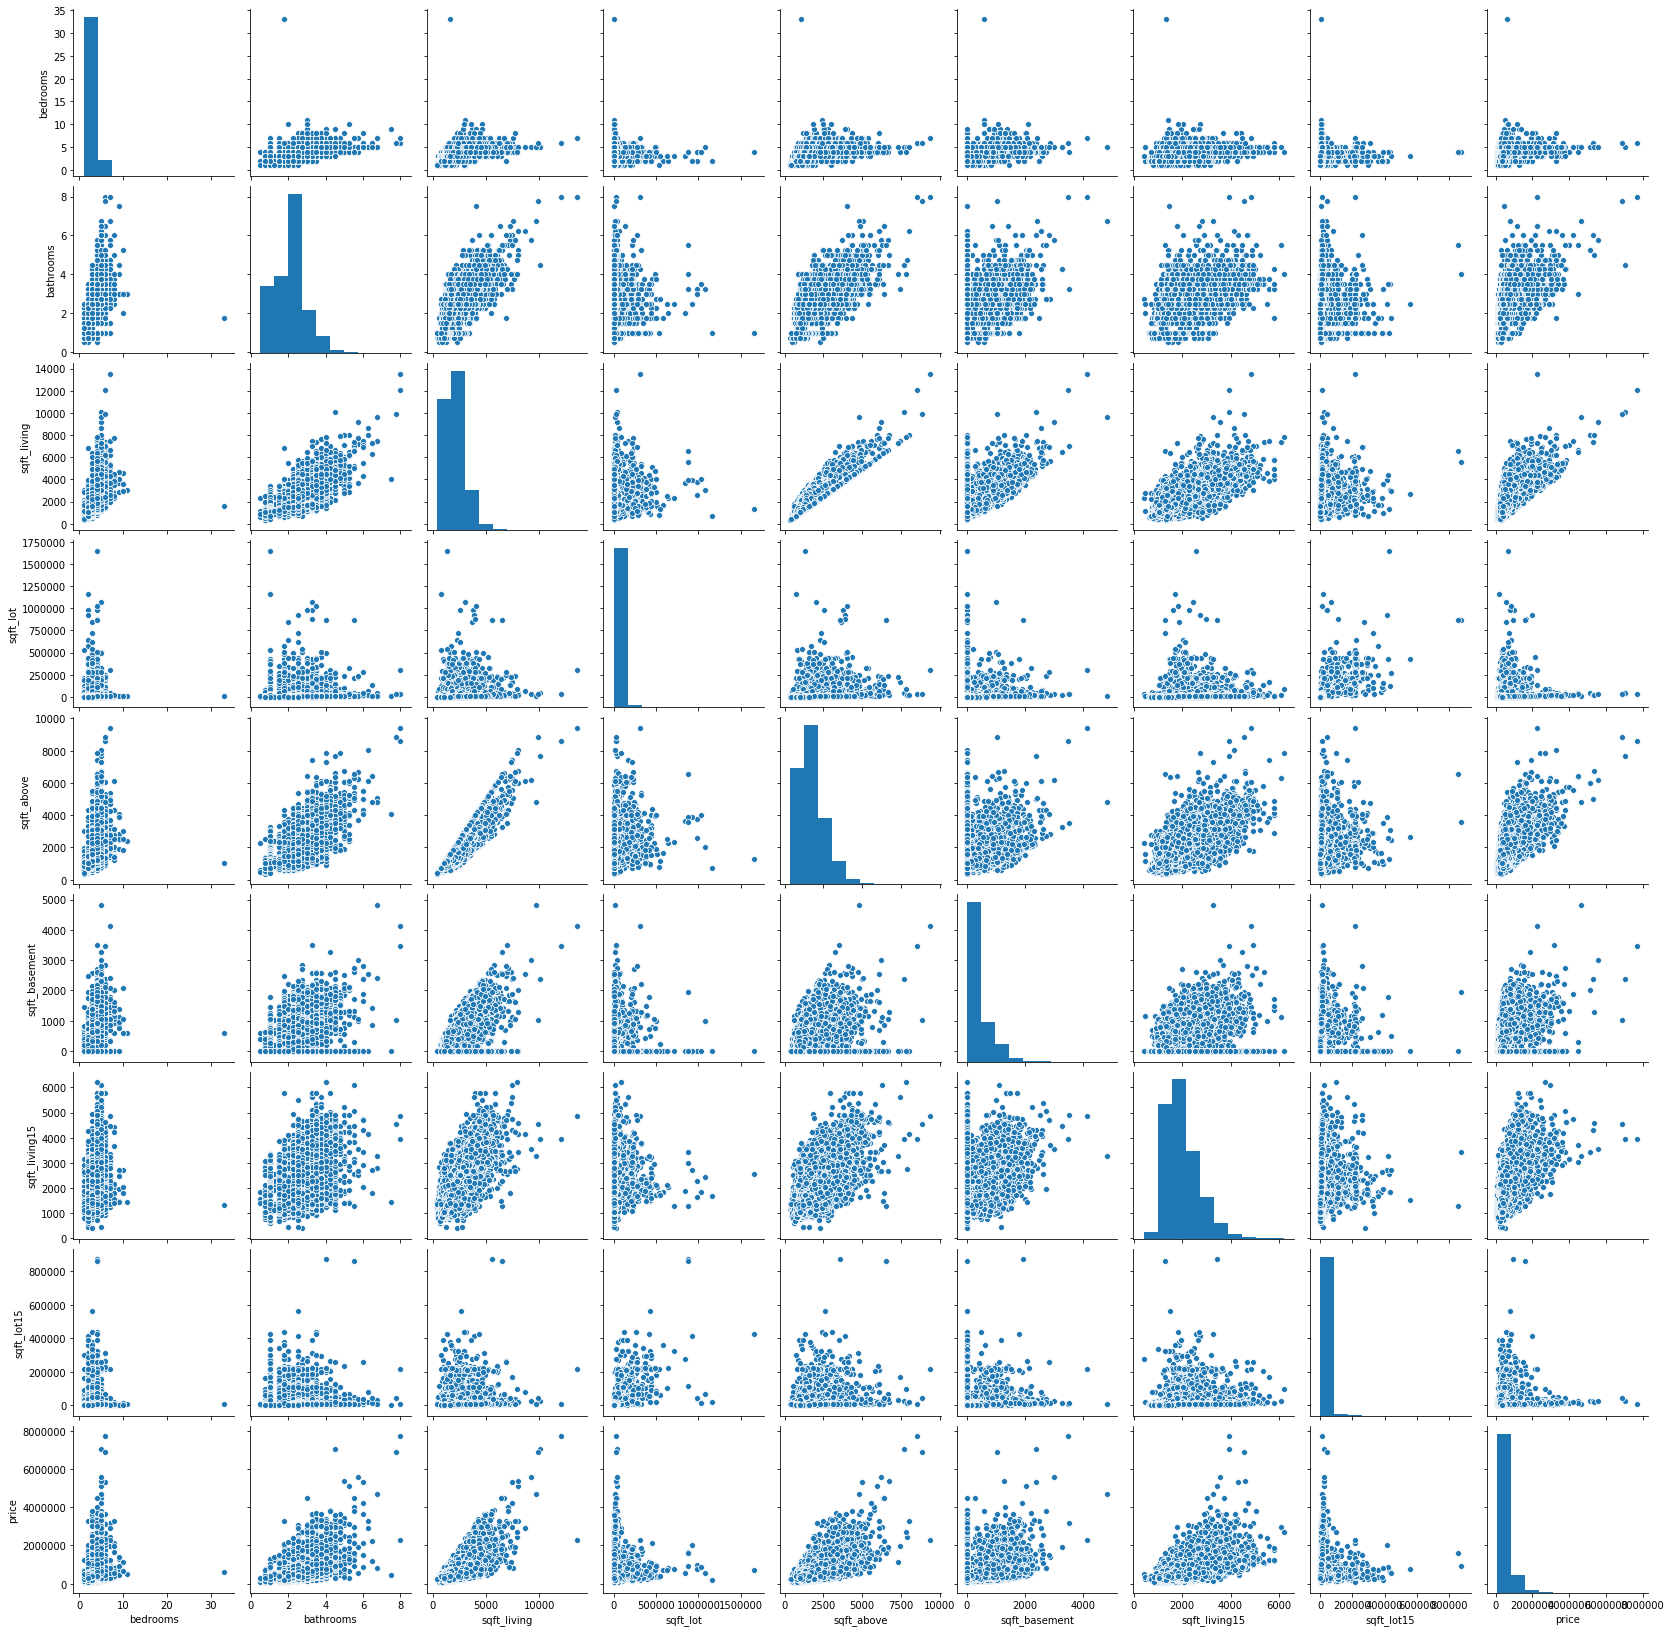

In [215]:
# Checking correlation to the target variable 'price' using scatter plots

sns.pairplot(realestate_con)
plt.show()

In [216]:
# From the scatter plots we see that there seem to be a positive correlation in selling price and
# bathrooms, sqft_living, sqft_above, sqft_basement and sqft_living15
# No appearent corraltion between price and bedrooms

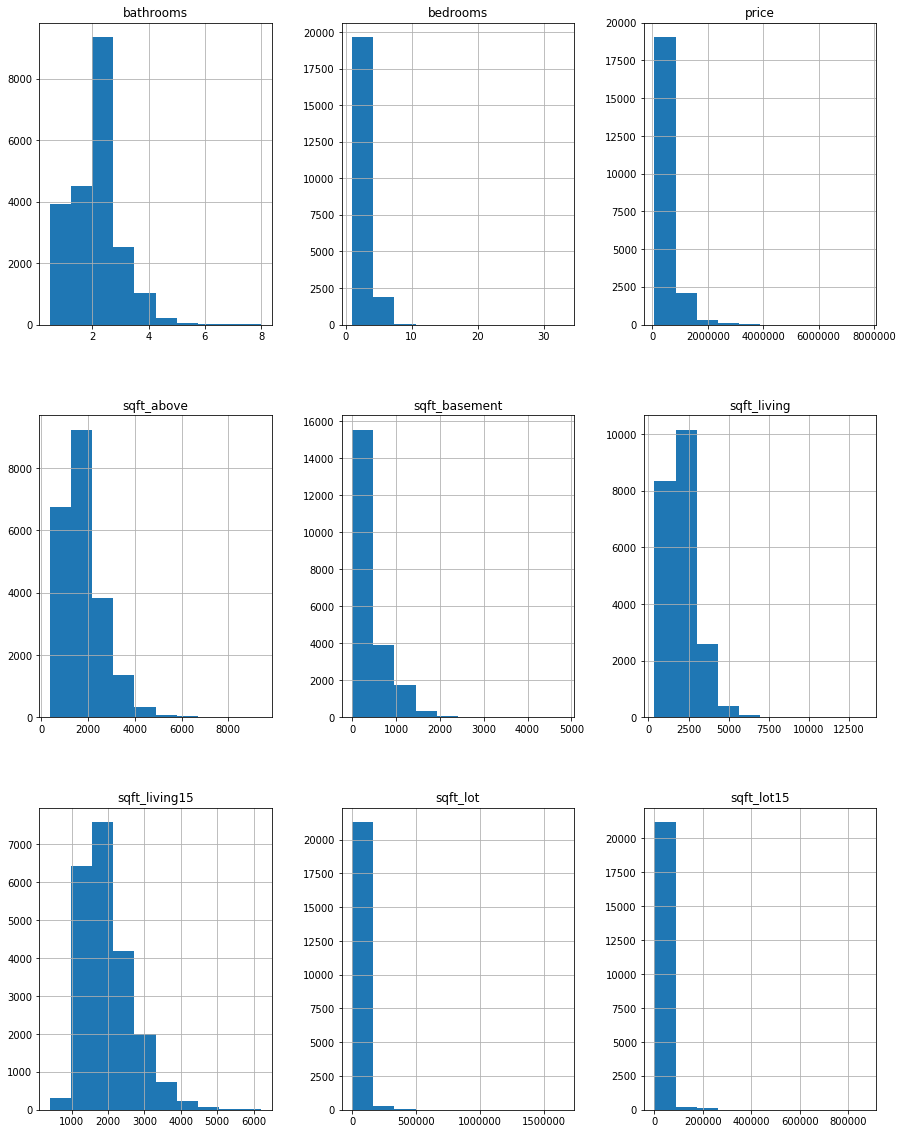

In [217]:
# Plotting using histograms to see the distribution

realestate_con.hist(figsize = (15,20));

In [218]:
# Right skewness suggest that we should normalise data before scaling


In [219]:
# Visualising using boxplot

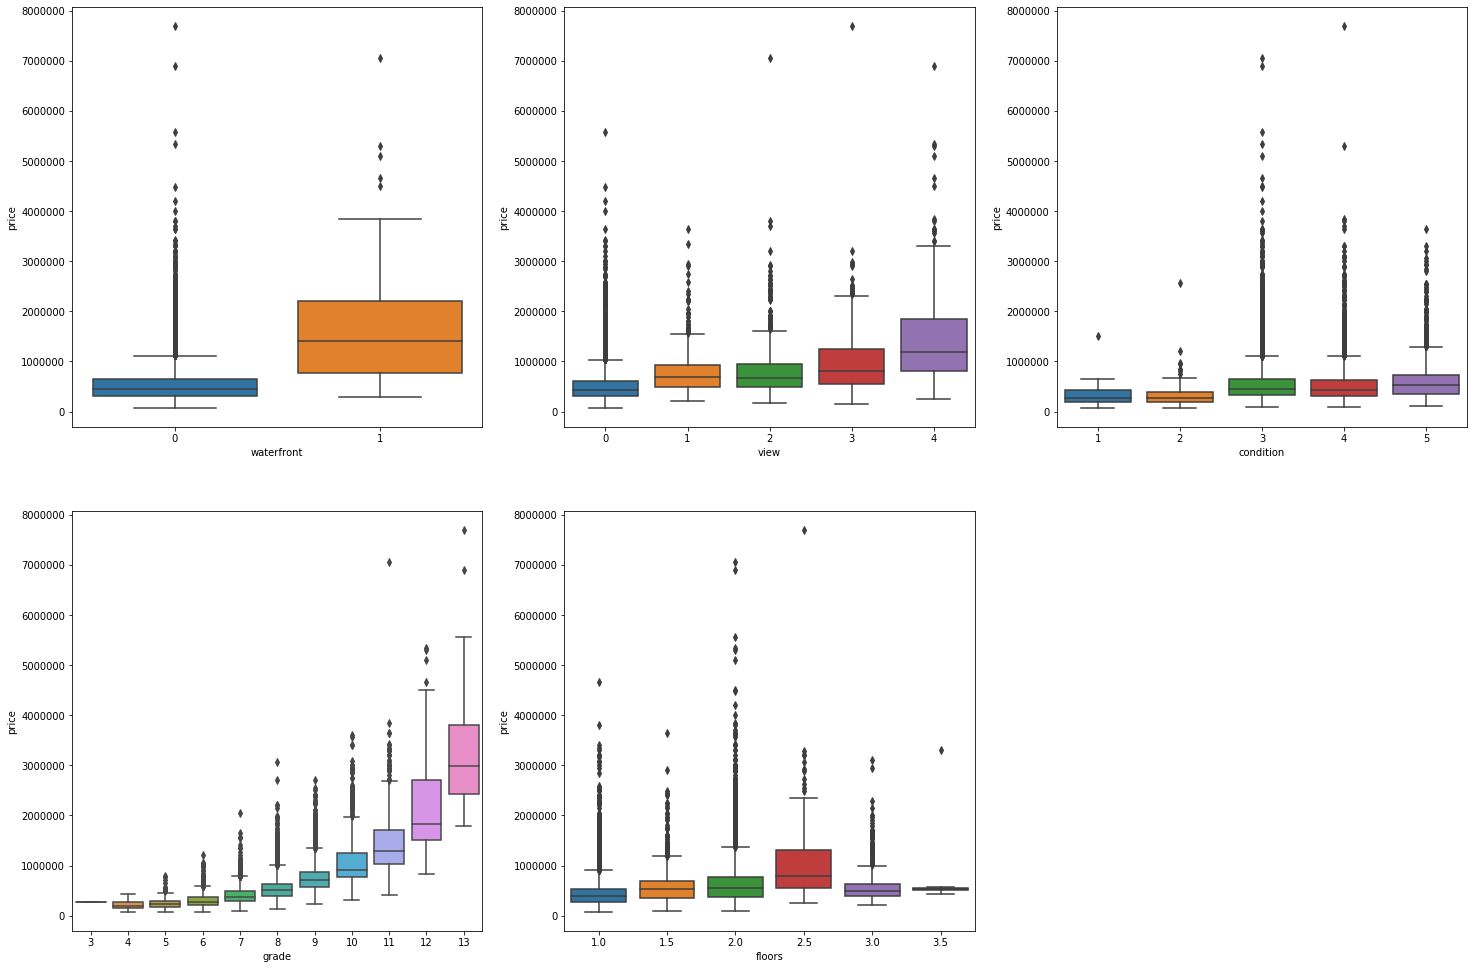

In [220]:
# I use box plots to check the correlation between selling price and variables that are categorical in nature

plt.figure(figsize=(25, 17))
plt.subplot(2,3,1)
sns.boxplot(x = 'waterfront', y = 'price', data = realestate)
plt.subplot(2,3,2)
sns.boxplot(x = 'view', y = 'price', data = realestate)
plt.subplot(2,3,3)
sns.boxplot(x = 'condition', y = 'price', data = realestate)
plt.subplot(2,3,4)
sns.boxplot(x = 'grade', y = 'price', data = realestate)
plt.subplot(2,3,5)
sns.boxplot(x = 'floors', y = 'price', data = realestate)
plt.show()

In [221]:
# We notice that the overall grade seem to play a big role in deciding the price of a house
# View and waterfront also seem to be positively correlated
# No appearent correlation for floors and condition

In [222]:
# It can be debated whether bathrooms, bedrooms and floors should be considered continuous or discrete
# Generally discrete values are whole numbers only, but due to the distribution of 'floors'
# I included this variable in the box plot visualisations

# Cleaning / Wrangling

In [223]:
# create a new dataframe and drop columns 'id' and 'date' since they will not add any value to the model

realestate_new = realestate.drop(['id', 'date'], axis = 1)
realestate_new

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [224]:
# Create dataframe for features that are going to be bucketed

realestate_cat = realestate_new[['yr_built', 'yr_renovated', 'bathrooms']]
realestate_cat

,yr_built,yr_renovated,bathrooms
0,1955,0,1.00
1,1951,1991,2.25
2,1933,0,1.00
3,1965,0,3.00
4,1987,0,2.00
...,...,...,...
21592,2009,0,2.50
21593,2014,0,2.50
21594,2009,0,0.75
21595,2004,0,2.50


In [225]:
# I bucket column 'yr_built' into three categorical variables to reduce redundant values

year_labels = ['Old', 'Middle-age', 'New']
def grouping_year(x):
    if x < 1950:
        return 'Old'
    elif x > 2000:
        return 'New'
    else:
        return 'Middle-age'

realestate_cat["yr_built"] = list(map(grouping_year, realestate_cat["yr_built"]))


In [226]:
realestate_cat['yr_built'].value_counts()       # Checking the values in each group

Middle-age    12124
Old            4935
New            4538
Name: yr_built, dtype: int64

In [227]:
realestate_cat    # Checking so that dataframe was updated correctly

,yr_built,yr_renovated,bathrooms
0,Middle-age,0,1.00
1,Middle-age,1991,2.25
2,Old,0,1.00
3,Middle-age,0,3.00
4,Middle-age,0,2.00
...,...,...,...
21592,New,0,2.50
21593,New,0,2.50
21594,New,0,0.75
21595,New,0,2.50


In [228]:
# I bucket 'yr_renovated' into two categorical variables

reno_labels = ['Yes', 'No']
def grouping_reno(x):
    if x > 0:
        return 'Yes'
    else:
        return 'No'


In [229]:
realestate_cat["yr_renovated"] = list(map(grouping_reno, realestate_cat["yr_renovated"]))

In [230]:
realestate_cat['yr_renovated'].value_counts()       # Checking the values in each group

No     20683
Yes      914
Name: yr_renovated, dtype: int64

In [231]:
# Group number of bathrooms to reduce redundant values 

bathroom_labels = ['0-2', '3-5', '6-8']
def grouping_bath(x):
    if x < 3:
        return '0-2'
    elif x > 5:
        return '6-8'
    else:
        return '3-5'


In [232]:
realestate_cat["bathrooms"] = list(map(grouping_bath, realestate_cat["bathrooms"]))

In [233]:
realestate_cat['bathrooms'].value_counts()       # Checking the values in each group

0-2    18967
3-5     2587
6-8       43
Name: bathrooms, dtype: int64

In [234]:
# Convert categorical features to binary numbers with pandas get dummies

realestate_cat = pd.get_dummies(data = realestate_cat, drop_first = True)
realestate_cat


,yr_built_New,yr_built_Old,yr_renovated_Yes,bathrooms_3-5,bathrooms_6-8
0,0,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,0,0
...,...,...,...,...,...
21592,1,0,0,0,0
21593,1,0,0,0,0
21594,1,0,0,0,0
21595,1,0,0,0,0


In [235]:
realestate_num = realestate_new.drop(['yr_built', 'yr_renovated', 'bathrooms'], axis = 1)


In [236]:
realestate_merged = pd.concat([realestate_cat, realestate_num], axis = 1)
realestate_merged

,yr_built_New,yr_built_Old,yr_renovated_Yes,bathrooms_3-5,bathrooms_6-8,bedrooms,sqft_living,sqft_lot,floors,waterfront,...,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0,0,0,0,0,3,1180,5650,1.0,0,...,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900
1,0,0,1,0,0,3,2570,7242,2.0,0,...,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000
2,0,1,0,0,0,2,770,10000,1.0,0,...,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000
3,0,0,0,1,0,4,1960,5000,1.0,0,...,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000
4,0,0,0,0,0,3,1680,8080,1.0,0,...,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1,0,0,0,0,3,1530,1131,3.0,0,...,3,8,1530,0,98103,47.6993,-122.346,1530,1509,360000
21593,1,0,0,0,0,4,2310,5813,2.0,0,...,3,8,2310,0,98146,47.5107,-122.362,1830,7200,400000
21594,1,0,0,0,0,2,1020,1350,2.0,0,...,3,7,1020,0,98144,47.5944,-122.299,1020,2007,402101
21595,1,0,0,0,0,3,1600,2388,2.0,0,...,3,8,1600,0,98027,47.5345,-122.069,1410,1287,400000


In [251]:
# Removing outlier in bedrooms

# I decide to remove the oulierrs from feature 'bedrooms'. Most sold properties have 3-4 bedrooms therefore
# are extreme outliers not representable of the dataset and may distort the results

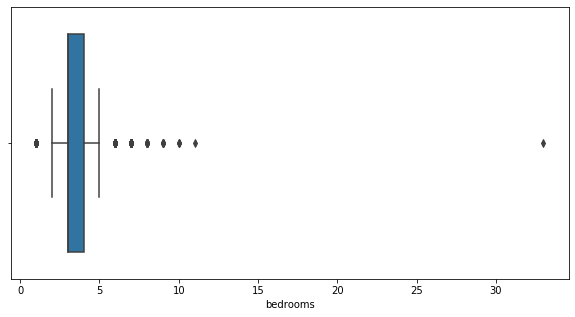

In [252]:
fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate_merged['bedrooms'])

plt.show()

In [253]:
# Define function to identify the upper and lower for removal of outliers

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    median = datacolumn.median()
    lower_limit = median - (1.5 * IQR)
    upper_limit = median + (1.5 * IQR)
    return lower_limit, upper_limit

In [254]:
# Identify the lower and upper limit

lower_bedroom, upper_bedroom = outlier_treatment(realestate_merged['bedrooms'])


In [255]:
# Exclude values from the column that are above or below the upper/lower limit

realestate_mod = realestate_merged[realestate_merged['bedrooms'] < upper_bedroom]
realestate_mod_1 = realestate_mod[realestate_mod['bedrooms'] > lower_bedroom]

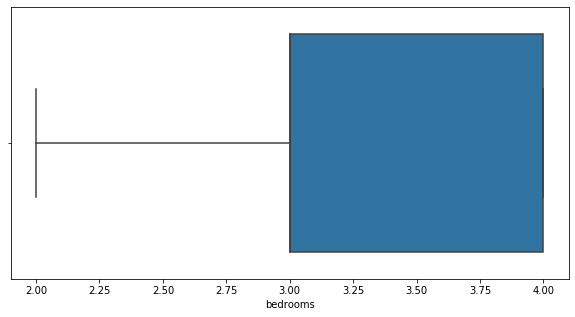

In [256]:
# Amended spread

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate_mod_1['bedrooms'])

plt.show()

In [257]:
realestate_clean = realestate_mod_1
realestate_clean

,yr_built_New,yr_built_Old,yr_renovated_Yes,bathrooms_3-5,bathrooms_6-8,bedrooms,sqft_living,sqft_lot,floors,waterfront,...,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0,0,0,0,0,3,1180,5650,1.0,0,...,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900
1,0,0,1,0,0,3,2570,7242,2.0,0,...,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000
2,0,1,0,0,0,2,770,10000,1.0,0,...,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000
3,0,0,0,1,0,4,1960,5000,1.0,0,...,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000
4,0,0,0,0,0,3,1680,8080,1.0,0,...,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1,0,0,0,0,3,1530,1131,3.0,0,...,3,8,1530,0,98103,47.6993,-122.346,1530,1509,360000
21593,1,0,0,0,0,4,2310,5813,2.0,0,...,3,8,2310,0,98146,47.5107,-122.362,1830,7200,400000
21594,1,0,0,0,0,2,1020,1350,2.0,0,...,3,7,1020,0,98144,47.5944,-122.299,1020,2007,402101
21595,1,0,0,0,0,3,1600,2388,2.0,0,...,3,8,1600,0,98027,47.5345,-122.069,1410,1287,400000


In [258]:
# Reset index after rows have been removed

realestate_clean = realestate_clean.reset_index(drop = True)
realestate_clean

,yr_built_New,yr_built_Old,yr_renovated_Yes,bathrooms_3-5,bathrooms_6-8,bedrooms,sqft_living,sqft_lot,floors,waterfront,...,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0,0,0,0,0,3,1180,5650,1.0,0,...,3,7,1180,0,98178,47.5112,-122.257,1340,5650,221900
1,0,0,1,0,0,3,2570,7242,2.0,0,...,3,7,2170,400,98125,47.7210,-122.319,1690,7639,538000
2,0,1,0,0,0,2,770,10000,1.0,0,...,3,6,770,0,98028,47.7379,-122.233,2720,8062,180000
3,0,0,0,1,0,4,1960,5000,1.0,0,...,5,7,1050,910,98136,47.5208,-122.393,1360,5000,604000
4,0,0,0,0,0,3,1680,8080,1.0,0,...,3,8,1680,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19461,1,0,0,0,0,3,1530,1131,3.0,0,...,3,8,1530,0,98103,47.6993,-122.346,1530,1509,360000
19462,1,0,0,0,0,4,2310,5813,2.0,0,...,3,8,2310,0,98146,47.5107,-122.362,1830,7200,400000
19463,1,0,0,0,0,2,1020,1350,2.0,0,...,3,7,1020,0,98144,47.5944,-122.299,1020,2007,402101
19464,1,0,0,0,0,3,1600,2388,2.0,0,...,3,8,1600,0,98027,47.5345,-122.069,1410,1287,400000


# Feature extraction

In [259]:
# Checking for correlation using a correlation matrix

corr_matrix = realestate_clean.corr()
corr_matrix

,yr_built_New,yr_built_Old,yr_renovated_Yes,bathrooms_3-5,bathrooms_6-8,bedrooms,sqft_living,sqft_lot,floors,waterfront,...,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price
yr_built_New,1.000000,-0.277849,-0.104336,0.203086,0.030496,0.076154,0.208034,-0.043398,0.547952,-0.021363,...,-0.316422,0.283299,0.303769,-0.154515,-0.063347,-0.012258,0.151624,0.161866,-0.057819,0.094756
yr_built_Old,-0.277849,1.000000,0.203108,-0.078024,-0.012918,-0.232890,-0.243816,-0.068389,-0.197109,0.019532,...,0.207652,-0.336604,-0.294611,0.063773,0.385590,0.166367,-0.367844,-0.255500,-0.086644,0.018183
yr_renovated_Yes,-0.104336,0.203108,1.000000,0.068803,0.006094,0.007908,0.049070,0.006835,-0.000548,0.092845,...,-0.058505,0.008766,0.015869,0.070127,0.065597,0.027221,-0.065293,-0.004461,0.007896,0.126357
bathrooms_3-5,0.203086,-0.078024,0.068803,1.000000,-0.007544,0.211393,0.456685,0.078373,0.250713,0.061541,...,-0.073863,0.400602,0.390790,0.188207,-0.007648,0.064121,0.030103,0.310222,0.066002,0.419416
bathrooms_6-8,0.030496,-0.012918,0.006094,-0.007544,1.000000,0.027926,0.116035,0.085026,0.014457,-0.001987,...,-0.011602,0.075135,0.111398,0.024692,-0.019584,0.004746,0.021595,0.043018,0.076831,0.109339
bedrooms,0.076154,-0.232890,0.007908,0.211393,0.027926,1.000000,0.554360,0.037536,0.194776,-0.018065,...,0.009129,0.373185,0.491292,0.196136,-0.193506,-0.053984,0.188249,0.417492,0.042816,0.272099
sqft_living,0.208034,-0.243816,0.049070,0.456685,0.116035,0.554360,1.000000,0.182756,0.348520,0.098299,...,-0.070997,0.761554,0.874526,0.376171,-0.200624,0.038842,0.260270,0.766099,0.195925,0.679389
sqft_lot,-0.043398,-0.068389,0.006835,0.078373,0.085026,0.037536,0.182756,1.000000,-0.009842,0.022485,...,-0.016715,0.118257,0.193055,0.005262,-0.128831,-0.087819,0.227869,0.150686,0.722594,0.099105
floors,0.547952,-0.197109,-0.000548,0.250713,0.014457,0.194776,0.348520,-0.009842,1.000000,0.017794,...,-0.271645,0.454065,0.511742,-0.264278,-0.059622,0.049999,0.121027,0.269866,-0.015155,0.247316
waterfront,-0.021363,0.019532,0.092845,0.061541,-0.001987,-0.018065,0.098299,0.022485,0.017794,1.000000,...,0.016294,0.081692,0.061208,0.084275,0.033418,-0.018165,-0.046519,0.087066,0.033184,0.259004


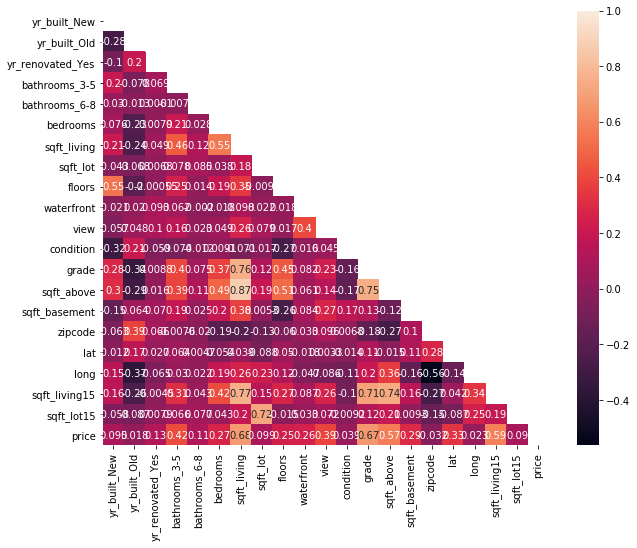

In [260]:
# Checking for correlations and multicorrilineraity using a heatmap

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr_matrix, mask = mask, annot = True)
plt.show()

In [261]:
# Since I suspect there might be high multicorrilineraity between some of the variables 
# I also check for multicorrilinearity using VIF

X = realestate_clean.drop(['price'], axis = 1)

In [262]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [263]:
# Calculate the VIF score

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,2.039295e+00,yr_built_New
1,1.773262e+00,yr_built_Old
2,1.139580e+00,yr_renovated_Yes
3,1.469229e+00,bathrooms_3-5
4,1.036706e+00,bathrooms_6-8
5,3.708019e+01,bedrooms
6,inf,sqft_living
7,2.404906e+00,sqft_lot
8,1.709487e+01,floors
9,1.211651e+00,waterfront


In [264]:
# I drop sqft_above to attempt reducing multicorrilineraity 

X = realestate_clean[['sqft_living', 'bathrooms_3-5', 'waterfront', 'grade', 'view']]


In [265]:
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif1['variable'] = X.columns
vif1

,VIF,variable
0,14.408984,sqft_living
1,1.354941,bathrooms_3-5
2,1.201043,waterfront
3,12.920439,grade
4,1.375152,view


In [266]:
# In the following section I played around with reducing and changing the variables in the dataframe
# to try to find four variables which had a high correlation to the selling price
# but at the same time control the VIF score

realestate_final = realestate_clean[['price', 'sqft_living', 'bathrooms_3-5', 'waterfront', 'grade', 'view']]


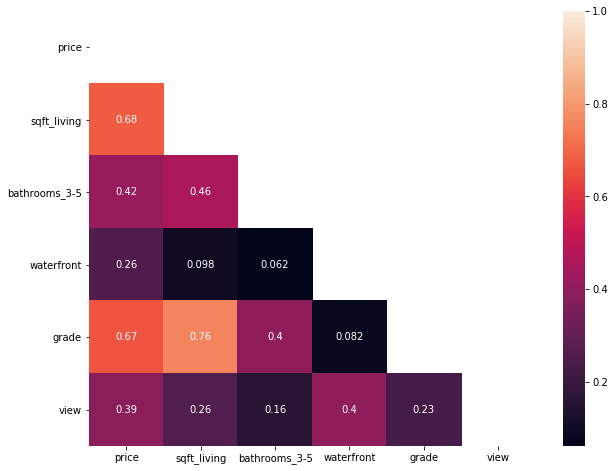

In [267]:
corr_matrix1 = realestate_final.corr()
mask = np.zeros_like(corr_matrix1)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr_matrix1, mask = mask, annot = True)
plt.show()

In [268]:
# The final choice of variables for the first time running the model

realestate_final

,price,sqft_living,bathrooms_3-5,waterfront,grade,view
0,221900,1180,0,0,7,0
1,538000,2570,0,0,7,0
2,180000,770,0,0,6,0
3,604000,1960,1,0,7,0
4,510000,1680,0,0,8,0
...,...,...,...,...,...,...
19461,360000,1530,0,0,8,0
19462,400000,2310,0,0,8,0
19463,402101,1020,0,0,7,0
19464,400000,1600,0,0,8,0


In [269]:
realestate_final.dtypes

price            int64
sqft_living      int64
bathrooms_3-5    uint8
waterfront       int64
grade            int64
view             int64
dtype: object

# Preprocessing

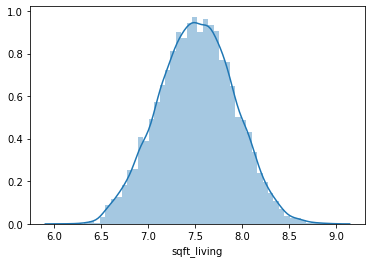

In [270]:
# I use numpy.log() to reduce skewness of numerical features before scaling

realestate_final['sqft_living'] = np.log(realestate_final['sqft_living'])
sns.distplot(realestate_final['sqft_living']);

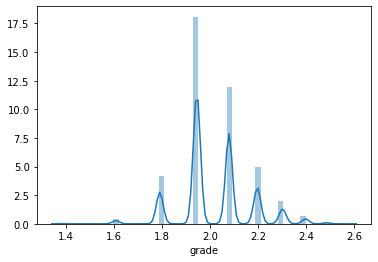

In [271]:
realestate_final['grade'] = np.log(realestate_final['grade'])
sns.distplot(realestate_final['grade']);

In [272]:
# Define X and the target variable y

X = realestate_final.drop(['price'], axis = 1)
y = realestate_final['price']


In [273]:
# Import library for normalisation

from sklearn.preprocessing import StandardScaler

In [274]:
# Define function for StandardScaler

columns = X.drop(['bathrooms_3-5', 'waterfront'], axis = 1)        # I rescale the independent variables but exclude the binary features

def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

realestate_final_1 = scale_data(realestate_final, columns, StandardScaler())

In [275]:
# Define X and the target variable y

X = realestate_final_1.drop(['price'], axis = 1)
X

,sqft_living,bathrooms_3-5,waterfront,grade,view
0,-1.105139,0,0,-0.510111,-0.29306
1,0.837727,0,0,-0.510111,-0.29306
2,-2.170629,0,0,-1.577655,-0.29306
3,0.161407,1,0,-0.510111,-0.29306
4,-0.223353,0,0,0.414637,-0.29306
...,...,...,...,...,...
19461,-0.456794,0,0,0.414637,-0.29306
19462,0.571507,0,0,0.414637,-0.29306
19463,-1.468835,0,0,-0.510111,-0.29306
19464,-0.345134,0,0,0.414637,-0.29306


In [276]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
19461    360000
19462    400000
19463    402101
19464    400000
19465    325000
Name: price, Length: 19466, dtype: int64

# Train test split

In [277]:
# Split into test and train datasets

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 

In [278]:
X_train

,sqft_living,bathrooms_3-5,waterfront,grade,view
3449,-0.921676,0,0,-0.510111,-0.293060
17494,-0.921676,0,0,-0.510111,-0.293060
9418,0.758795,0,0,0.414637,-0.293060
17167,-2.593497,0,0,-1.577655,-0.293060
10925,-0.009890,0,0,-0.510111,2.434507
...,...,...,...,...,...
11284,0.261260,0,0,-0.510111,-0.293060
11964,0.357272,0,0,0.414637,-0.293060
5390,0.148640,0,0,0.414637,-0.293060
860,-0.037319,0,0,-0.510111,-0.293060


In [279]:
X_test

,sqft_living,bathrooms_3-5,waterfront,grade,view
15789,0.708165,0,0,1.230323,-0.293060
3547,0.148640,0,0,-1.577655,-0.293060
2308,-0.065052,0,0,0.414637,-0.293060
341,-0.360782,1,0,-0.510111,-0.293060
11010,1.415969,0,0,0.414637,2.434507
...,...,...,...,...,...
17577,1.813900,1,0,1.959978,-0.293060
1358,1.587147,1,0,1.230323,2.434507
14298,-2.203257,0,0,-0.510111,-0.293060
17546,-0.107239,0,0,-0.510111,2.434507


In [280]:
y_train

3449      348000
17494     465000
9418     1150000
17167     295000
10925     585000
          ...   
11284     355000
11964     550000
5390      560000
860       260000
15795    1220000
Name: price, Length: 15572, dtype: int64

In [281]:
y_test

15789     431000
3547      400000
2308      493000
341       275000
11010     902000
          ...   
17577    2400000
1358     1220000
14298     183000
17546     490000
3851      215000
Name: price, Length: 3894, dtype: int64

# The Linear Regression Model

In [282]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define and fit the model

from sklearn import linear_model

linreg = LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg = linreg.predict(X_test)   

In [283]:
# Prediction for y

y_pred_linreg

array([674445.81015451, 315848.50582393, 523298.10809681, ...,
       254886.79465028, 576295.45221757, 399027.15309635])

In [284]:
# Evaluate the model using R-squared

print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))


train R2: 0.5353330045418814 -- test R2: 0.5636416798155419


In [285]:
# MSE

from sklearn.metrics import mean_squared_error as mse

train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 47012739904.86102 -- test MSE: 45930715086.36715


In [286]:
# RMSE

print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 216824.21429550028 -- test RMSE: 214314.5237410828


In [287]:
# MAE

from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(linreg.predict(X_test), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 47012739904.86102 -- test MAE: 45930715086.36715


In [288]:
# Review the regression results using an OLS statement

import statsmodels.api as sm
from statsmodels.formula.api import ols
Y = realestate_final[['price']]
X = realestate_final_1.drop(['price'], axis = 1)
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     4593.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:55:39   Log-Likelihood:            -2.6675e+05
No. Observations:               19466   AIC:                         5.335e+05
Df Residuals:                   19460   BIC:                         5.336e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.975e+05   1648.063    301.881

# KNN Model

In [289]:
# Define the model

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 4) # We use a K of 4
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [290]:
# Get our prediction

knn_predictions = knn_model.predict(X_test)


In [291]:
# Our error metrics to evaluate the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 152152.12
The mean squared error of the model in the test set is: 47456246821.57
The root mean squared error of the model in the test set is: 217844.55
The R2 of the model in the test set is: 0.55
